# Data Cleaning
## Importing and Formatting

In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from wordcloud import WordCloud
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
import nltk
np.random.seed(0)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('Hotel_Reviews.csv')

In [3]:
df.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


In [4]:
print(df.shape)

print(df.info())

(515738, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-nu

In [5]:
df.keys()

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [6]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [7]:
df.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

# Column & Data Removal

In [8]:
#remove columns not needed
df = df.drop(['lat','lng','days_since_review'], axis=1)

In [9]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre..."
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex..."
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St..."


In [10]:
# checking for rows that are missing all text data
len(df[df.Negative_Review.isnull()])

0

In [11]:
df.isnull().sum()

Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
dtype: int64

In [12]:
len(df)

515738

In [13]:
df.Negative_Review = df.Negative_Review.str.lower()

In [14]:
df.head(20)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,i am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,no negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre..."
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,my room was dirty and i was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex..."
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,you when i booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St..."
5,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,Poland,backyard of the hotel is total mess shouldn t...,17,1403,Good restaurant with modern design great chil...,20,1,6.7,"[' Leisure trip ', ' Group ', ' Duplex Double ..."
6,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,cleaner did not change our sheet and duvet ev...,33,1403,The room is spacious and bright The hotel is ...,18,6,4.6,"[' Leisure trip ', ' Group ', ' Duplex Twin Ro..."
7,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,apart from the price for the brekfast everyth...,11,1403,Good location Set in a lovely park friendly s...,19,1,10.0,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
8,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/9/2017,7.7,Hotel Arena,Belgium,even though the pictures show very clean room...,34,1403,No Positive,0,3,6.5,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
9,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/8/2017,7.7,Hotel Arena,Norway,the aircondition makes so much noise and its ...,15,1403,The room was big enough and the bed is good T...,50,1,7.9,"[' Leisure trip ', ' Couple ', ' Large King Ro..."


In [15]:
#check 'Negative_Review' for punctuations. punctuations already removed
list(df.Negative_Review)

[' i am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place i made my booking via booking com we stayed for 6 nights in this hotel from 11 to 17 july upon arrival we were placed in a small room on the 2nd floor of the hotel it turned out that this was not the room we booked i had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings the room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it i intimately asked to change the room and after explaining 2 times that i booked a duplex btw it costs the same as a simple double but got way more volume due to the high ceiling was offered a room but only the next day so i had to check out the next day before 11 o clock in order to get the room i waned to not the best way to begin 

# EDA
## Basic Statistics

In [16]:
# number of hotels
df.Hotel_Name.nunique()

1492

In [17]:
df.Negative_Review.nunique()

326756

In [18]:
df.Reviewer_Nationality.nunique()

227

In [19]:
df.Hotel_Name.value_counts()

Britannia International Hotel Canary Wharf           4789
Strand Palace Hotel                                  4256
Park Plaza Westminster Bridge London                 4169
Copthorne Tara Hotel London Kensington               3578
DoubleTree by Hilton Hotel London Tower of London    3212
                                                     ... 
Hotel Eitlj rg                                         12
Le Lavoisier                                           12
Hotel Wagner                                           10
Mercure Paris Porte d Orleans                          10
Hotel Gallitzinberg                                     8
Name: Hotel_Name, Length: 1492, dtype: int64

In [20]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,i am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,no negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre..."
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,my room was dirty and i was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex..."
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,you when i booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St..."


In [21]:
for review in df['Negative_Review']:
    for symbol in ",.?!''\n":
        review.replace(symbol, '').lower()

In [22]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,i am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,no negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre..."
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,my room was dirty and i was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex..."
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,you when i booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St..."


In [23]:
# dropped "no negatives"
indexNames = df[df['Negative_Review'] == 'no negative' ].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [24]:
df.shape

(387848, 14)

In [25]:
df.head(10)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,i am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre..."
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,my room was dirty and i was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex..."
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,you when i booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St..."
5,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,Poland,backyard of the hotel is total mess shouldn t...,17,1403,Good restaurant with modern design great chil...,20,1,6.7,"[' Leisure trip ', ' Group ', ' Duplex Double ..."
6,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,cleaner did not change our sheet and duvet ev...,33,1403,The room is spacious and bright The hotel is ...,18,6,4.6,"[' Leisure trip ', ' Group ', ' Duplex Twin Ro..."
7,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,apart from the price for the brekfast everyth...,11,1403,Good location Set in a lovely park friendly s...,19,1,10.0,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
8,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/9/2017,7.7,Hotel Arena,Belgium,even though the pictures show very clean room...,34,1403,No Positive,0,3,6.5,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
9,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/8/2017,7.7,Hotel Arena,Norway,the aircondition makes so much noise and its ...,15,1403,The room was big enough and the bed is good T...,50,1,7.9,"[' Leisure trip ', ' Couple ', ' Large King Ro..."
10,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/7/2017,7.7,Hotel Arena,United Kingdom,nothing all great,5,1403,Rooms were stunningly decorated and really sp...,101,2,10.0,"[' Leisure trip ', ' Group ', ' Duplex Double ..."


# WordCloud

In [26]:
count_vectorizer = CountVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6, max_features=4000)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6, max_features=4000)

cv_data = count_vectorizer.fit_transform(df.Negative_Review)
tfidf_data = tfidf_vectorizer.fit_transform(df.Negative_Review)

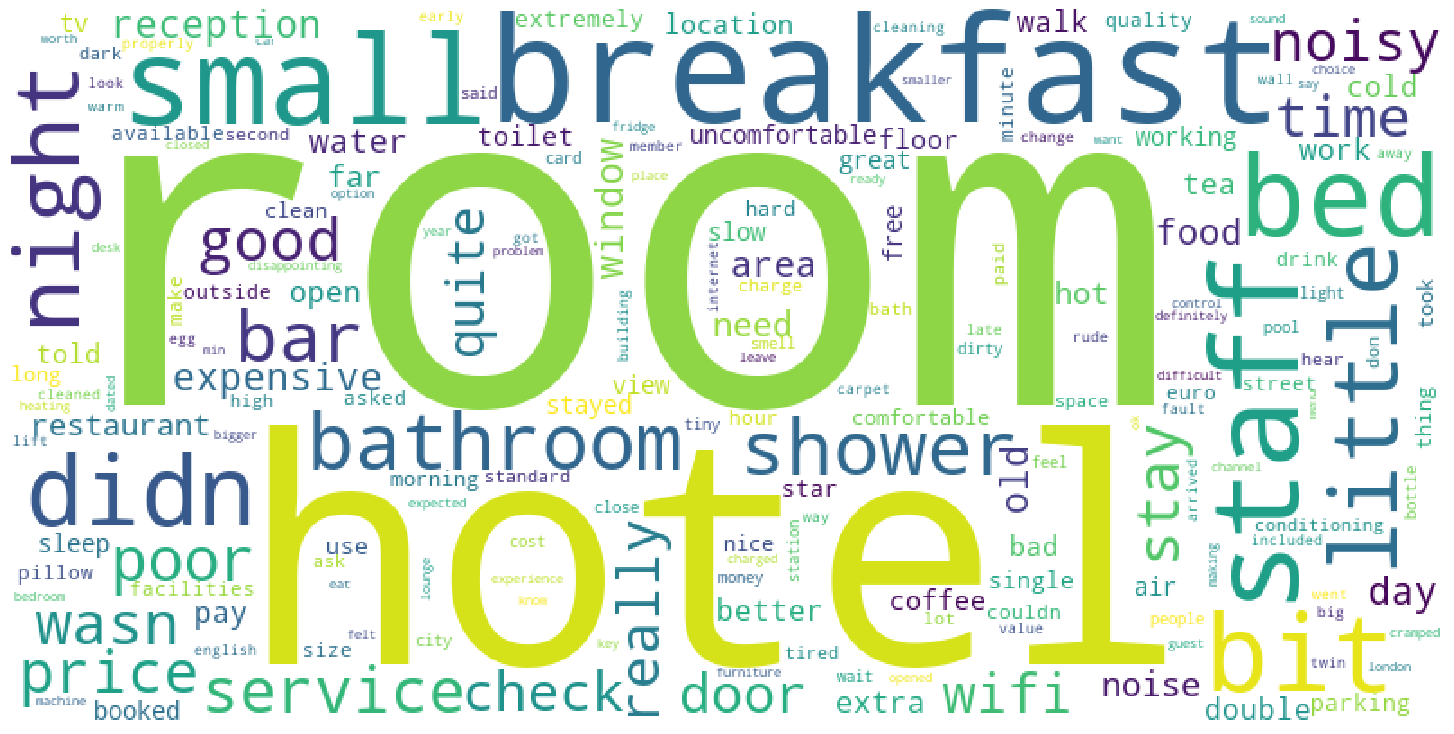

In [27]:
for_wordcloud = count_vectorizer.get_feature_names()
for_wordcloud = for_wordcloud
for_wordcloud_str = ' '.join(for_wordcloud)

wordcloud = WordCloud(width=800, height=400, background_color ='white',
                      min_font_size = 7).generate(for_wordcloud_str)

plt.figure(figsize=(20, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
 
plt.show()

In [28]:
df.shape

(387848, 14)

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/flatironschool/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
df['Negative_Review'] = df['Negative_Review'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df['Negative_Review'] = df['Negative_Review'].map(lambda x: x.lower())
# Print out the first rows of papers
df['Negative_Review'].head()

0     i am so angry that i made this post available...
2     rooms are nice but for elderly a bit difficul...
3     my room was dirty and i was afraid to walk ba...
4     you when i booked with your company on line y...
5     backyard of the hotel is total mess shouldn t...
Name: Negative_Review, dtype: object

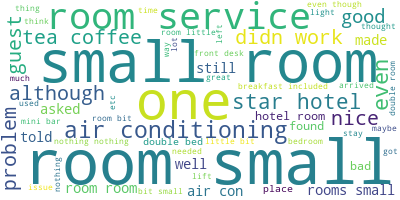

In [31]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed reviews together.
long_string = ','.join(list(df['Negative_Review'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [32]:
long_string[:200]

' i am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place i made my booking via booking com we stayed for '

In [33]:
tokens = word_tokenize(long_string)

In [34]:
tokens[:10]

['i', 'am', 'so', 'angry', 'that', 'i', 'made', 'this', 'post', 'available']

## Removing Stop Words and Punctuation

In [35]:
import nltk
from nltk.corpus import gutenberg, stopwords
from nltk.collocations import *
from nltk import FreqDist
from nltk import word_tokenize
import string
import re

In [36]:
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

df_words_stopped = [word for word in tokens if word not in stopwords_list]

In [37]:
df_words_stopped

['angry',
 'made',
 'post',
 'available',
 'via',
 'possible',
 'sites',
 'use',
 'planing',
 'trips',
 'one',
 'make',
 'mistake',
 'booking',
 'place',
 'made',
 'booking',
 'via',
 'booking',
 'com',
 'stayed',
 'nights',
 'hotel',
 '11',
 '17',
 'july',
 'upon',
 'arrival',
 'placed',
 'small',
 'room',
 '2nd',
 'floor',
 'hotel',
 'turned',
 'room',
 'booked',
 'specially',
 'reserved',
 'level',
 'duplex',
 'room',
 'would',
 'big',
 'windows',
 'high',
 'ceilings',
 'room',
 'ok',
 'mind',
 'broken',
 'window',
 'closed',
 'hello',
 'rain',
 'mini',
 'fridge',
 'contained',
 'sort',
 'bio',
 'weapon',
 'least',
 'guessed',
 'smell',
 'intimately',
 'asked',
 'change',
 'room',
 'explaining',
 'times',
 'booked',
 'duplex',
 'btw',
 'costs',
 'simple',
 'double',
 'got',
 'way',
 'volume',
 'due',
 'high',
 'ceiling',
 'offered',
 'room',
 'next',
 'day',
 'check',
 'next',
 'day',
 '11',
 'clock',
 'order',
 'get',
 'room',
 'waned',
 'best',
 'way',
 'begin',
 'holiday',
 'wait

In [38]:
stopwords_list


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## lemmatizing example

In [39]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np


In [40]:
print(WordNetLemmatizer().lemmatize('went', pos='v'))

go


In [41]:
print(WordNetLemmatizer().lemmatize(long_string, pos='v'))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## stemmer example

In [42]:
stemmer = SnowballStemmer('english')
original_words = ['caresses', 'flies', 'dies', 'mules', 'denied','died', 'agreed', 'owned', 
           'humbled', 'sized','meeting', 'stating', 'siezing', 'itemization','sensational', 
           'traditional', 'reference', 'colonizer','plotted']
singles = [stemmer.stem(plural) for plural in original_words]
pd.DataFrame(data = {'original word': original_words, 'stemmed': singles})

,original word,stemmed
0,caresses,caress
1,flies,fli
2,dies,die
3,mules,mule
4,denied,deni
5,died,die
6,agreed,agre
7,owned,own
8,humbled,humbl
9,sized,size


In [43]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))


In [44]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS:
            result.append(lemmatize_stemming(token))
    return result

In [45]:
#stemming
processed_docs = df['Negative_Review'].map(preprocess)
print(processed_docs)

0         [angri, post, avail, possibl, sit, use, plan, ...
2         [room, nice, elder, bite, difficult, room, sto...
3         [room, dirti, afraid, walk, barefoot, floor, l...
4         [book, compani, line, show, pictur, room, thin...
5         [backyard, hotel, total, mess, shouldn, happen...
                                ...                        
515731               [park, public, park, garag, euro, day]
515733                  [trolli, staff, help, luggag, room]
515734                            [hotel, look, like, sure]
515735     [ac, useless, hot, week, vienna, give, hot, air]
515737                        [rd, floor, work, free, wife]
Name: Negative_Review, Length: 387848, dtype: object


In [46]:
#stemming
preprocess(long_string)

['angri',
 'post',
 'avail',
 'possibl',
 'sit',
 'use',
 'plan',
 'trip',
 'mistak',
 'book',
 'place',
 'book',
 'book',
 'com',
 'stay',
 'night',
 'hotel',
 'juli',
 'arriv',
 'place',
 'small',
 'room',
 'nd',
 'floor',
 'hotel',
 'turn',
 'room',
 'book',
 'special',
 'reserv',
 'level',
 'duplex',
 'room',
 'big',
 'window',
 'high',
 'ceil',
 'room',
 'ok',
 'mind',
 'break',
 'window',
 'close',
 'hello',
 'rain',
 'mini',
 'fridg',
 'contain',
 'sort',
 'bio',
 'weapon',
 'guess',
 'smell',
 'intim',
 'ask',
 'chang',
 'room',
 'explain',
 'time',
 'book',
 'duplex',
 'btw',
 'cost',
 'simpl',
 'doubl',
 'get',
 'way',
 'volum',
 'high',
 'ceil',
 'offer',
 'room',
 'day',
 'check',
 'day',
 'clock',
 'order',
 'room',
 'wan',
 'best',
 'way',
 'begin',
 'holiday',
 'wait',
 'till',
 'order',
 'check',
 'new',
 'room',
 'wonder',
 'waist',
 'time',
 'room',
 'get',
 'want',
 'peac',
 'intern',
 'garden',
 'view',
 'big',
 'window',
 'tire',
 'wait',
 'room',
 'place',
 'belon

In [47]:
list(processed_docs[:10])

[['angri',
  'post',
  'avail',
  'possibl',
  'sit',
  'use',
  'plan',
  'trip',
  'mistak',
  'book',
  'place',
  'book',
  'book',
  'com',
  'stay',
  'night',
  'hotel',
  'juli',
  'arriv',
  'place',
  'small',
  'room',
  'nd',
  'floor',
  'hotel',
  'turn',
  'room',
  'book',
  'special',
  'reserv',
  'level',
  'duplex',
  'room',
  'big',
  'window',
  'high',
  'ceil',
  'room',
  'ok',
  'mind',
  'break',
  'window',
  'close',
  'hello',
  'rain',
  'mini',
  'fridg',
  'contain',
  'sort',
  'bio',
  'weapon',
  'guess',
  'smell',
  'intim',
  'ask',
  'chang',
  'room',
  'explain',
  'time',
  'book',
  'duplex',
  'btw',
  'cost',
  'simpl',
  'doubl',
  'get',
  'way',
  'volum',
  'high',
  'ceil',
  'offer',
  'room',
  'day',
  'check',
  'day',
  'clock',
  'order',
  'room',
  'wan',
  'best',
  'way',
  'begin',
  'holiday',
  'wait',
  'till',
  'order',
  'check',
  'new',
  'room',
  'wonder',
  'waist',
  'time',
  'room',
  'get',
  'want',
  'peac'

In [48]:
#Frequency Distributions
df.freqdist = FreqDist(tokens)
df.freqdist.most_common(50)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


[('the', 531268),
 (',', 387841),
 ('was', 236750),
 ('a', 230251),
 ('to', 228892),
 ('and', 219473),
 ('room', 176026),
 ('in', 168040),
 ('not', 127445),
 ('i', 122298),
 ('of', 120631),
 ('for', 117655),
 ('it', 107124),
 ('we', 99303),
 ('is', 82191),
 ('very', 80597),
 ('but', 75665),
 ('hotel', 74709),
 ('t', 72474),
 ('no', 69992),
 ('on', 68744),
 ('were', 61672),
 ('at', 61162),
 ('had', 60151),
 ('that', 58901),
 ('breakfast', 58477),
 ('have', 54713),
 ('with', 51994),
 ('small', 49880),
 ('there', 46486),
 ('be', 45275),
 ('as', 44092),
 ('they', 42632),
 ('you', 40600),
 ('from', 40251),
 ('this', 39699),
 ('staff', 39512),
 ('so', 39272),
 ('my', 38794),
 ('nothing', 38768),
 ('rooms', 34802),
 ('our', 33993),
 ('would', 32291),
 ('could', 32079),
 ('when', 30932),
 ('bed', 29828),
 ('are', 29386),
 ('all', 29139),
 ('too', 28800),
 ('one', 28095)]

In [49]:
df.freqdist = FreqDist(df_words_stopped)
df.freqdist.most_common(50)

[('room', 176026),
 ('hotel', 74709),
 ('breakfast', 58477),
 ('small', 49880),
 ('staff', 39512),
 ('nothing', 38768),
 ('rooms', 34802),
 ('would', 32291),
 ('could', 32079),
 ('bed', 29828),
 ('one', 28095),
 ('bit', 27546),
 ('bathroom', 26585),
 ('night', 24063),
 ('little', 22536),
 ('like', 22445),
 ('shower', 21290),
 ('good', 20821),
 ('us', 20225),
 ('get', 19504),
 ('service', 19323),
 ('bar', 19132),
 ('time', 17481),
 ('stay', 17430),
 ('reception', 16646),
 ('really', 16549),
 ('expensive', 16542),
 ('also', 16468),
 ('poor', 16104),
 ('even', 15417),
 ('check', 15367),
 ('price', 15280),
 ('day', 15152),
 ('floor', 14946),
 ('water', 14279),
 ('noisy', 13933),
 ('air', 13261),
 ('work', 12955),
 ('coffee', 12756),
 ('wifi', 12617),
 ('door', 12533),
 ('hot', 12157),
 ('better', 12069),
 ('quite', 12013),
 ('noise', 11811),
 ('much', 11572),
 ('booking', 11515),
 ('food', 11470),
 ('two', 11189),
 ('location', 11008)]

In [50]:
len(df.freqdist)

55478

In [51]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df_words_stopped)
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

KeyboardInterrupt: 

## Normalized Word Frequency

In [ ]:
total_word_count = sum(df.freqdist.values())
df_top_50 = df.freqdist.most_common(50)
print('Word\t\t\tNormalized Frequency')
for word in df_top_50:
    normalized_frequency = word[1] / total_word_count
    print('{} \t\t\t {:.4}'.format(word[0], normalized_frequency))

## Creating Bigrams

In [ ]:
bigram_measures = nltk.collocations.BigramAssocMeasures()


In [ ]:
df_finder = BigramCollocationFinder.from_words(df_words_stopped)


In [ ]:
df_scored = df_finder.score_ngrams(bigram_measures.raw_freq)


In [ ]:
df_scored[:50]


## Using Mutual Information Scores


In [ ]:
df_pmi_finder = BigramCollocationFinder.from_words(df_words_stopped)


In [ ]:
df_pmi_finder.apply_freq_filter(5)


In [ ]:
df_pmi_scored = df_pmi_finder.score_ngrams(bigram_measures.pmi)


In [ ]:
df_pmi_scored

## visualization - pyLDAvis.sklearn

In [ ]:
from __future__ import print_function

In [ ]:
pip install pyLDAvis

In [ ]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
#                                 stop_words = 'english',
#                                 lowercase = True,
#                                 token_pattern = r'\b[a-zA-Z]{3,}\b',
#                                 max_df = 0.5, 
#                                 min_df = 10)
# dtm_tf = tf_vectorizer.fit_transform(docs_raw)
# print(dtm_tf.shape)

## Convert to document-term matrix

In [ ]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(df.Negative_Review
                                )
print(dtm_tf.shape)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(df.Negative_Review)
print(dtm_tfidf.shape)

## Fit Latent Dirichlet Allocation models

In [ ]:
# # for TF DTM
# lda_tf = LatentDirichletAllocation(n_components=10, random_state=0)
# lda_tf.fit(dtm_tf)
# # for TFIDF DTM
# lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
# lda_tfidf.fit(dtm_tfidf)

## Visualizing the models with pyLDAvis

In [ ]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

In [ ]:
type(df_words_stopped)

In [ ]:
processed_docs

## Vectorizing with TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
#Bag of Words on the Data set
'''Create a dictionary from ‘processed_docs’ containing the number of times a word 
appears in the training set.'''

dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

In [ ]:
'''Filter out tokens that appear in
less than 15 documents (absolute number) or
more than 0.5 documents (fraction of total corpus size, not absolute number).
after the above two steps, keep only the first 100000 most frequent tokens.'''
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)


In [ ]:
#Gensim doc2bow
'''For each document we create a dictionary reporting how many
words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier.'''
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

In [ ]:
#Preview Bag Of Words for our sample preprocessed document.
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))


## TF-IDF

In [ ]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

## Running LDA using Bag of Words

In [ ]:
#Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [ ]:
#For each topic, we will explore the words occuring in that topic and its relative weight.
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

## Running LDA using TF-IDF


In [ ]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))